In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [3]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [5]:
x_test = test_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [10]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten


In [12]:
model=Sequential()


In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))


In [15]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 80s 440ms/step - loss: 1.3780 - accuracy: 0.4383 - val_loss: 1.2233 - val_accuracy: 0.4929
Epoch 2/10
180/180 [==============================] - 46s 255ms/step - loss: 1.0655 - accuracy: 0.5768 - val_loss: 1.1165 - val_accuracy: 0.5763
Epoch 3/10
180/180 [==============================] - 48s 269ms/step - loss: 0.9939 - accuracy: 0.6139 - val_loss: 1.0989 - val_accuracy: 0.5652
Epoch 4/10
180/180 [==============================] - 46s 254ms/step - loss: 0.9353 - accuracy: 0.6389 - val_loss: 0.8946 - val_accuracy: 0.6569
Epoch 5/10
180/180 [==============================] - 46s 253ms/step - loss: 0.8983 - accuracy: 0.6511 - val_loss: 0.8835 - val_accuracy: 0.6542
Epoch 6/10
180/180 [==============================] - 46s 256ms/step - loss: 0.8634 - accuracy: 0.6706 - val_loss: 0.8214 - val_accuracy: 0.6949
Epoch 7/10
180/180 [==============================] - 48s 268ms/step - loss: 0.8085 - accuracy: 0.6801 - val_loss: 0.8447 - val_ac

In [20]:
model.save('IBM_flowers.h5')

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [23]:
model=load_model('IBM_flowers.h5')

In [24]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\daisy/5547758_eea9edfd54_n.jpg')

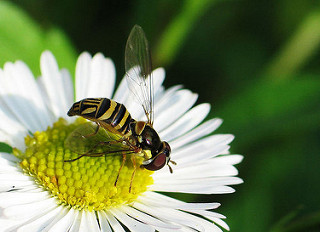

In [25]:
img

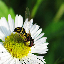

In [26]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\daisy/5547758_eea9edfd54_n.jpg',target_size=(64,64))
img

In [27]:
x=image.img_to_array(img)
x

array([[[ 95., 139.,  60.],
        [ 67., 107.,  37.],
        [ 41.,  69.,  28.],
        ...,
        [ 37.,  67.,  13.],
        [ 40.,  62.,  15.],
        [ 32.,  64.,  15.]],

       [[130., 173.,  93.],
        [101., 146.,  63.],
        [ 65., 114.,  33.],
        ...,
        [ 39.,  70.,  13.],
        [ 39.,  69.,  17.],
        [ 34.,  69.,  11.]],

       [[147., 192.,  99.],
        [129., 180.,  79.],
        [110., 155.,  62.],
        ...,
        [ 46.,  74.,  16.],
        [ 49.,  81.,  18.],
        [ 51.,  87.,  17.]],

       ...,

       [[251., 251., 249.],
        [250., 250., 248.],
        [252., 252., 250.],
        ...,
        [ 25.,  45.,  17.],
        [ 25.,  43.,  17.],
        [ 21.,  37.,  11.]],

       [[250., 250., 250.],
        [250., 250., 248.],
        [238., 238., 236.],
        ...,
        [ 19.,  33.,  10.],
        [ 16.,  29.,   9.],
        [ 14.,  25.,   9.]],

       [[250., 250., 250.],
        [226., 226., 224.],
        [209., 2

In [28]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 95., 139.,  60.],
         [ 67., 107.,  37.],
         [ 41.,  69.,  28.],
         ...,
         [ 37.,  67.,  13.],
         [ 40.,  62.,  15.],
         [ 32.,  64.,  15.]],

        [[130., 173.,  93.],
         [101., 146.,  63.],
         [ 65., 114.,  33.],
         ...,
         [ 39.,  70.,  13.],
         [ 39.,  69.,  17.],
         [ 34.,  69.,  11.]],

        [[147., 192.,  99.],
         [129., 180.,  79.],
         [110., 155.,  62.],
         ...,
         [ 46.,  74.,  16.],
         [ 49.,  81.,  18.],
         [ 51.,  87.,  17.]],

        ...,

        [[251., 251., 249.],
         [250., 250., 248.],
         [252., 252., 250.],
         ...,
         [ 25.,  45.,  17.],
         [ 25.,  43.,  17.],
         [ 21.,  37.,  11.]],

        [[250., 250., 250.],
         [250., 250., 248.],
         [238., 238., 236.],
         ...,
         [ 19.,  33.,  10.],
         [ 16.,  29.,   9.],
         [ 14.,  25.,   9.]],

        [[250., 250., 250.],
       

In [29]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 175ms/step


array([0], dtype=int64)

In [30]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [31]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [32]:
index[y[0]]

'daisy'